## Chi-square Test for Independence

### Introduction
In this notebook, we will perform a chi-square test for independence to assess the relationship between two categorical variables using a sample dataset from the Pingouin library. The analysis focuses on whether age categories are associated with the target variable.

### Dataset Description
The dataset contains the following columns:
- **age**: Continuous variable representing the age of individuals.
- **target**: Categorical variable indicating the outcome or group assignment for each individual.
- **age_cat**: Derived categorical variable created by binning the `age` column into discrete categories (e.g., Young, Middle-aged, Senior, Elderly).

### Problem Statement
- **Null Hypothesis (H₀):** The `age_cat` variable and `target` are independent.
- **Alternative Hypothesis (H₁):** The `age_cat` variable and `target` are associated.

In [13]:
# Import Pingouin for statistical tests
import pingouin as pg

# Import NumPy for numerical operations
import numpy as np

# Import pandas for data manipulation
import pandas as pd

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Set significance level for hypothesis testing
alpha = 0.05

In [14]:
# read pingouin inbuilt dataset for chi2 test.
df = pg.read_dataset("chi2_independence.csv")
# inspect dataset using head.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Creating Age Categories
To enable categorical analysis, we derive a new column `age_cat` by binning the continuous `age` values into discrete age groups. This transformation allows us to examine the association between age categories and the target variable using the chi-square test.

In [15]:
# create new age categories column to split age values into five categories using pd.cut and linspace from numpy.
df['age_cat'] = pd.cut(df['age'], bins=np.linspace(df['age'].min(), df['age'].max(), 5), labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])


### Visualizing Target Distribution by Age Category
The following plot displays the distribution of the target variable across the derived age categories. This visualization helps to observe any patterns or differences in the target variable among different age groups before conducting the chi-square test for independence.

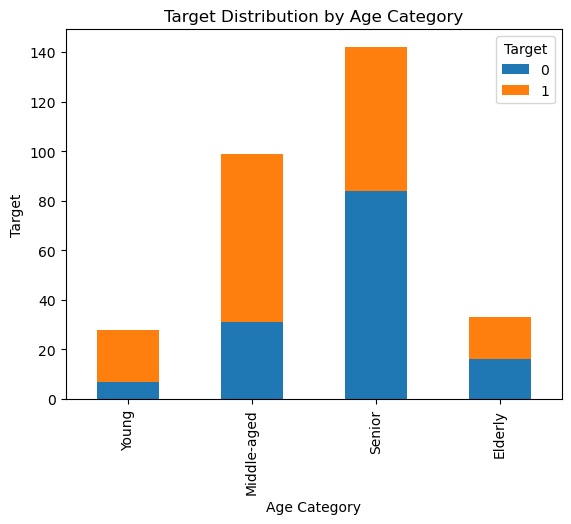

In [16]:
props = df.groupby('age_cat', observed=True)['target'].value_counts()
props.unstack().plot(kind='bar', stacked=True)
plt.title('Target Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Target')
plt.legend(title='Target')
plt.show()

### Performing the Chi-square Test for Independence
We now perform the chi-square test for independence using the `pg.chi2_independence` function from Pingouin. This test evaluates whether there is a significant association between age categories and the target variable.
### Extracting Pearson Test Results and p-value
After running the test, we extract the results for the Pearson chi-square test and obtain the p-value, which will be used to determine statistical significance.
### Interpreting the Results
We compare the calculated p-value with the chosen significance level (alpha = 0.05):
- If the p-value is less than alpha, we reject the null hypothesis and conclude that there is a significant association between age categories and the target variable.
- If the p-value is greater than or equal to alpha, we fail to reject the null hypothesis and conclude that there is no significant association between age categories and the target variable.

In [17]:
expected, observed, stats = pg.chi2_independence(df, x='age_cat', y='target', 
                                                       correction=False)
print(stats)    
pearson = stats.loc[stats['test'] == 'pearson']
print(pearson)
pval = pearson['pval'].values[0]


                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  23.555330  3.0  0.000031  0.278820  0.990092
1        cressie-read  0.666667  23.677821  3.0  0.000029  0.279544  0.990410
2      log-likelihood  0.000000  24.071790  3.0  0.000024  0.281860  0.991369
3       freeman-tukey -0.500000  24.507558  3.0  0.000020  0.284399  0.992323
4  mod-log-likelihood -1.000000  25.075584  3.0  0.000015  0.287676  0.993417
5              neyman -2.000000  26.666653  3.0  0.000007  0.296663  0.995745
      test  lambda      chi2  dof      pval   cramer     power
0  pearson     1.0  23.55533  3.0  0.000031  0.27882  0.990092


In [18]:
if pval < alpha:
    print(f"p-value = {pval:.4f} < alpha = {alpha}. Reject the null hypothesis: There is a significant association between age categories and the target variable.")
else:
    print(f"p-value = {pval:.4f} >= alpha = {alpha}. Fail to reject the null hypothesis: There is no significant association between age categories and the target variable.")

p-value = 0.0000 < alpha = 0.05. Reject the null hypothesis: There is a significant association between age categories and the target variable.
